## Solar abundances
this is a very important input into chemical evolution models. Even more since in Chempy we use solar abundances to constrain Milky Way parameters. We will show how Chempy handles the solar abundances and how different authors compare to each other.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
## We have to call all Chempy functions from within the /Chempy/source/ folder

from Chempy.parameter import ModelParameters
from Chempy.solar_abundance import solar_abundances

In [3]:
# This loads the default parameters, you can check and change them in paramter.py

a = ModelParameters() 

## Implemented solar abundance tables

In [4]:
# These are the implemented solar abundances

print(a.solar_abundance_name_list) 

['Lodders09', 'Asplund09', 'Asplund05_pure_solar', 'Asplund05_apogee_correction', 'AG89']


In [5]:
# First we load the default solar abundances from Asplund 2009

basic_solar = solar_abundances()
getattr(basic_solar, a.solar_abundance_name)() 

## Fractions of the Sun

In [6]:
# The Hydrogen fraction

basic_solar.x 

0.7373977678803461

In [7]:
# The Helium fraction

basic_solar.y 

0.24923529618045798

In [8]:
# The metallicity (all elements heavier than Helium)

basic_solar.z 

0.013366935939195926

## A list of all elements and their fractions/abundances

In [9]:
print('#, symbol, mass fraction, photospheric abundance, error')
txt = "{0:3s} {1:3d} {2:.8f} {3:0.2f} {4:.2f}"
for i, (item, a, b) in enumerate(zip(basic_solar.all_elements[:30], 
                                        basic_solar.fractions, 
                                        basic_solar.table)): 
    print(txt.format(item, i + 1, a, b['photospheric'], b['error']))

#, symbol, mass fraction, photospheric abundance, error
H     1 0.73739777 12.00 0.00
He    2 0.24923530 10.93 0.01
Li    3 0.00000001 3.26 0.05
Be    4 0.00000000 1.30 0.03
B     5 0.00000000 2.79 0.04
C     6 0.00236502 8.43 0.05
N     7 0.00069279 7.83 0.05
O     8 0.00573285 8.69 0.05
F     9 0.00000037 4.42 0.06
Ne   10 0.00125656 7.93 0.10
Na   11 0.00002923 6.24 0.04
Mg   12 0.00070789 7.60 0.04
Al   13 0.00005563 6.45 0.03
Si   14 0.00066489 7.51 0.03
P    15 0.00000582 5.41 0.03
S    16 0.00030924 7.12 0.03
Cl   17 0.00000440 5.23 0.06
Ar   18 0.00007341 6.40 0.13
K    19 0.00000306 5.03 0.09
Ca   20 0.00006415 6.34 0.04
Sc   21 0.00000005 3.15 0.04
Ti   22 0.00000312 4.95 0.05
V    23 0.00000032 3.93 0.08
Cr   24 0.00001660 5.64 0.04
Mn   25 0.00001082 5.43 0.04
Fe   26 0.00129197 7.50 0.04
Co   27 0.00000421 4.99 0.07
Ni   28 0.00007126 6.22 0.04
Cu   29 0.00000072 4.19 0.04
Zn   30 0.00000174 4.56 0.05


## Visualization of the famous Solar abundances pattern

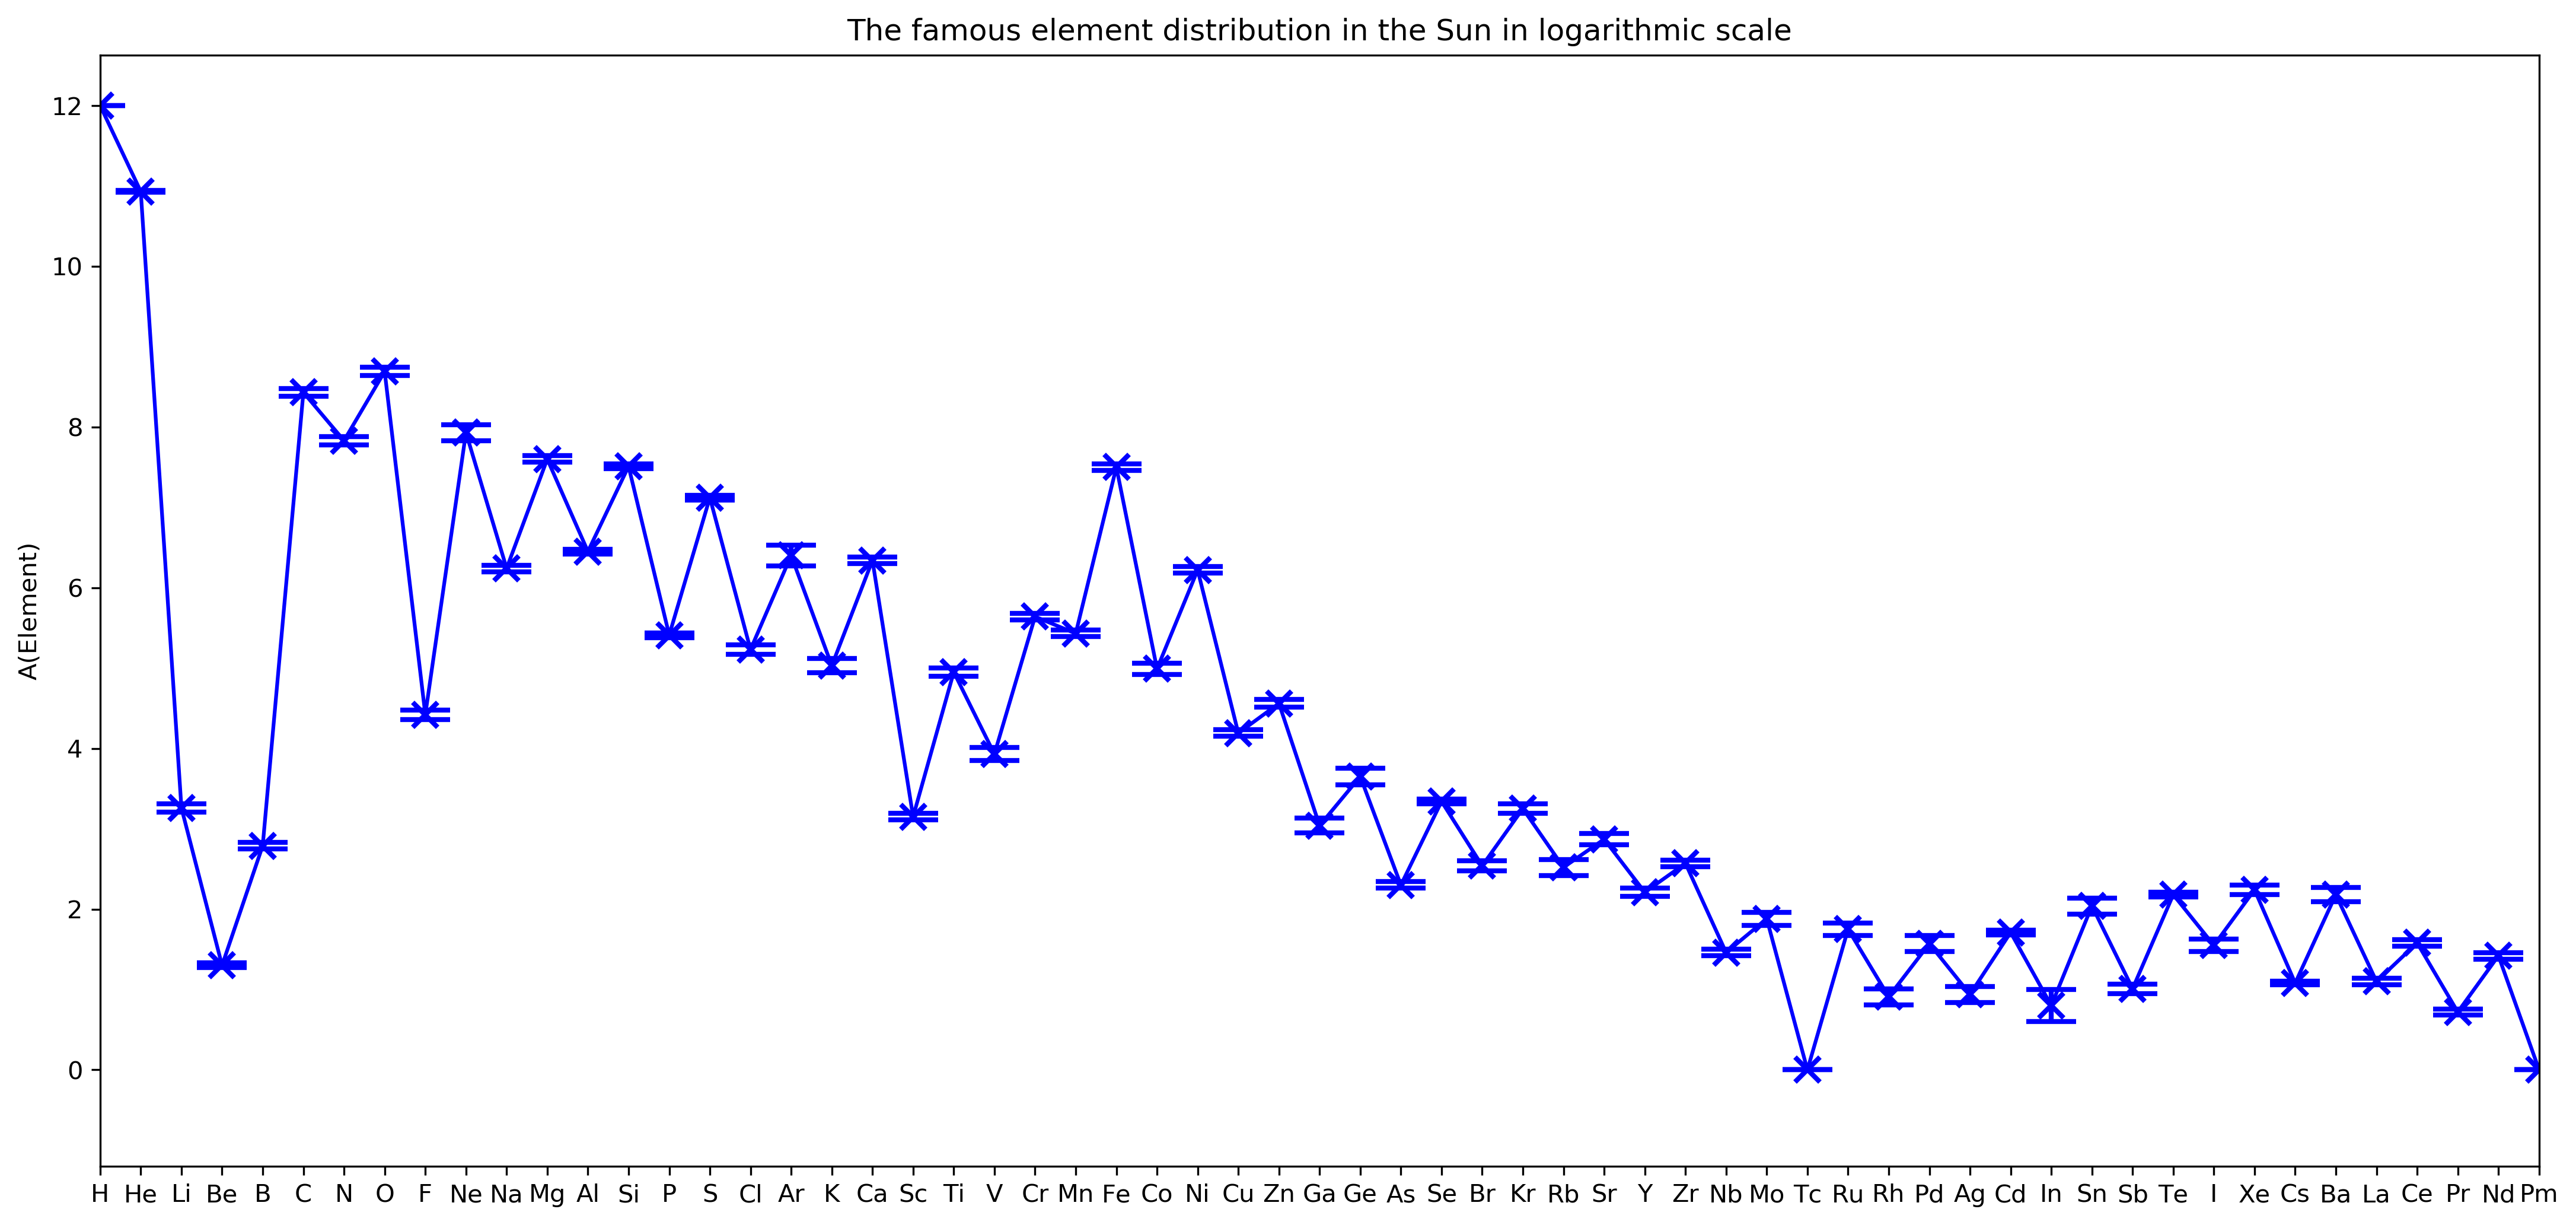

In [10]:
# these are all the element names
symbols = np.array(basic_solar.all_elements)

# Plotting the table up to Element 60

fig = plt.figure(figsize=(17.69,8.27), dpi=300)
ax1 = fig.add_subplot(111)
ax1.errorbar(np.arange(len(symbols)), basic_solar.table['photospheric'], xerr=None,yerr=basic_solar.table['error'],linestyle = '-',marker='x',capthick =2,capsize = 10, ms = 10, mew = 2, color = 'b',elinewidth=2,label= 'Solar abundances')
plt.xticks(np.arange(len(symbols)), symbols)
plt.xlim((0,60))
plt.ylabel("A(Element)")
plt.title("The famous element distribution in the Sun in logarithmic scale")
plt.show()

## Elements sorted by their Solar mass fraction.

In [11]:
# We sort the elements for their masses

j = np.argsort(basic_solar.fractions)[::-1] 

# And print a list of top 20 most abundant elements in the Sun (according to Asplund+ 2009)

print('Symbol, Mass fraction') 
for i,item in enumerate(symbols[j][:20]):
    print('{0:3d}'.format(i+1),
          '{0:3s}'.format(item),
          '{0:.6f}'.format(basic_solar.fractions[j][i]))

Symbol, Mass fraction
  1 H   0.737398
  2 He  0.249235
  3 O   0.005733
  4 C   0.002365
  5 Fe  0.001292
  6 Ne  0.001257
  7 Mg  0.000708
  8 N   0.000693
  9 Si  0.000665
 10 S   0.000309
 11 Ar  0.000073
 12 Ni  0.000071
 13 Ca  0.000064
 14 Al  0.000056
 15 Na  0.000029
 16 Cr  0.000017
 17 Mn  0.000011
 18 P   0.000006
 19 Cl  0.000004
 20 Co  0.000004


## Comparison of the metallicity from different authors

In [12]:
# The same functionality is available for the other solar abundances, we also load Lodders+ 2009

basic_solar_lodders = solar_abundances()
getattr(basic_solar_lodders, 'Lodders09')()

# And Asplund+ 2005

basic_solar_asplund05 = solar_abundances() 
basic_solar_asplund05.Asplund05_pure_solar()

# Then we print their metallicities:

print('{0:2f}'.format(basic_solar.z), 
      '{0:2f}'.format(basic_solar_lodders.z), 
      '{0:2f}'.format(basic_solar_asplund05.z))

0.013367 0.014031 0.012205


## Comparison of different Solar abundance patterns

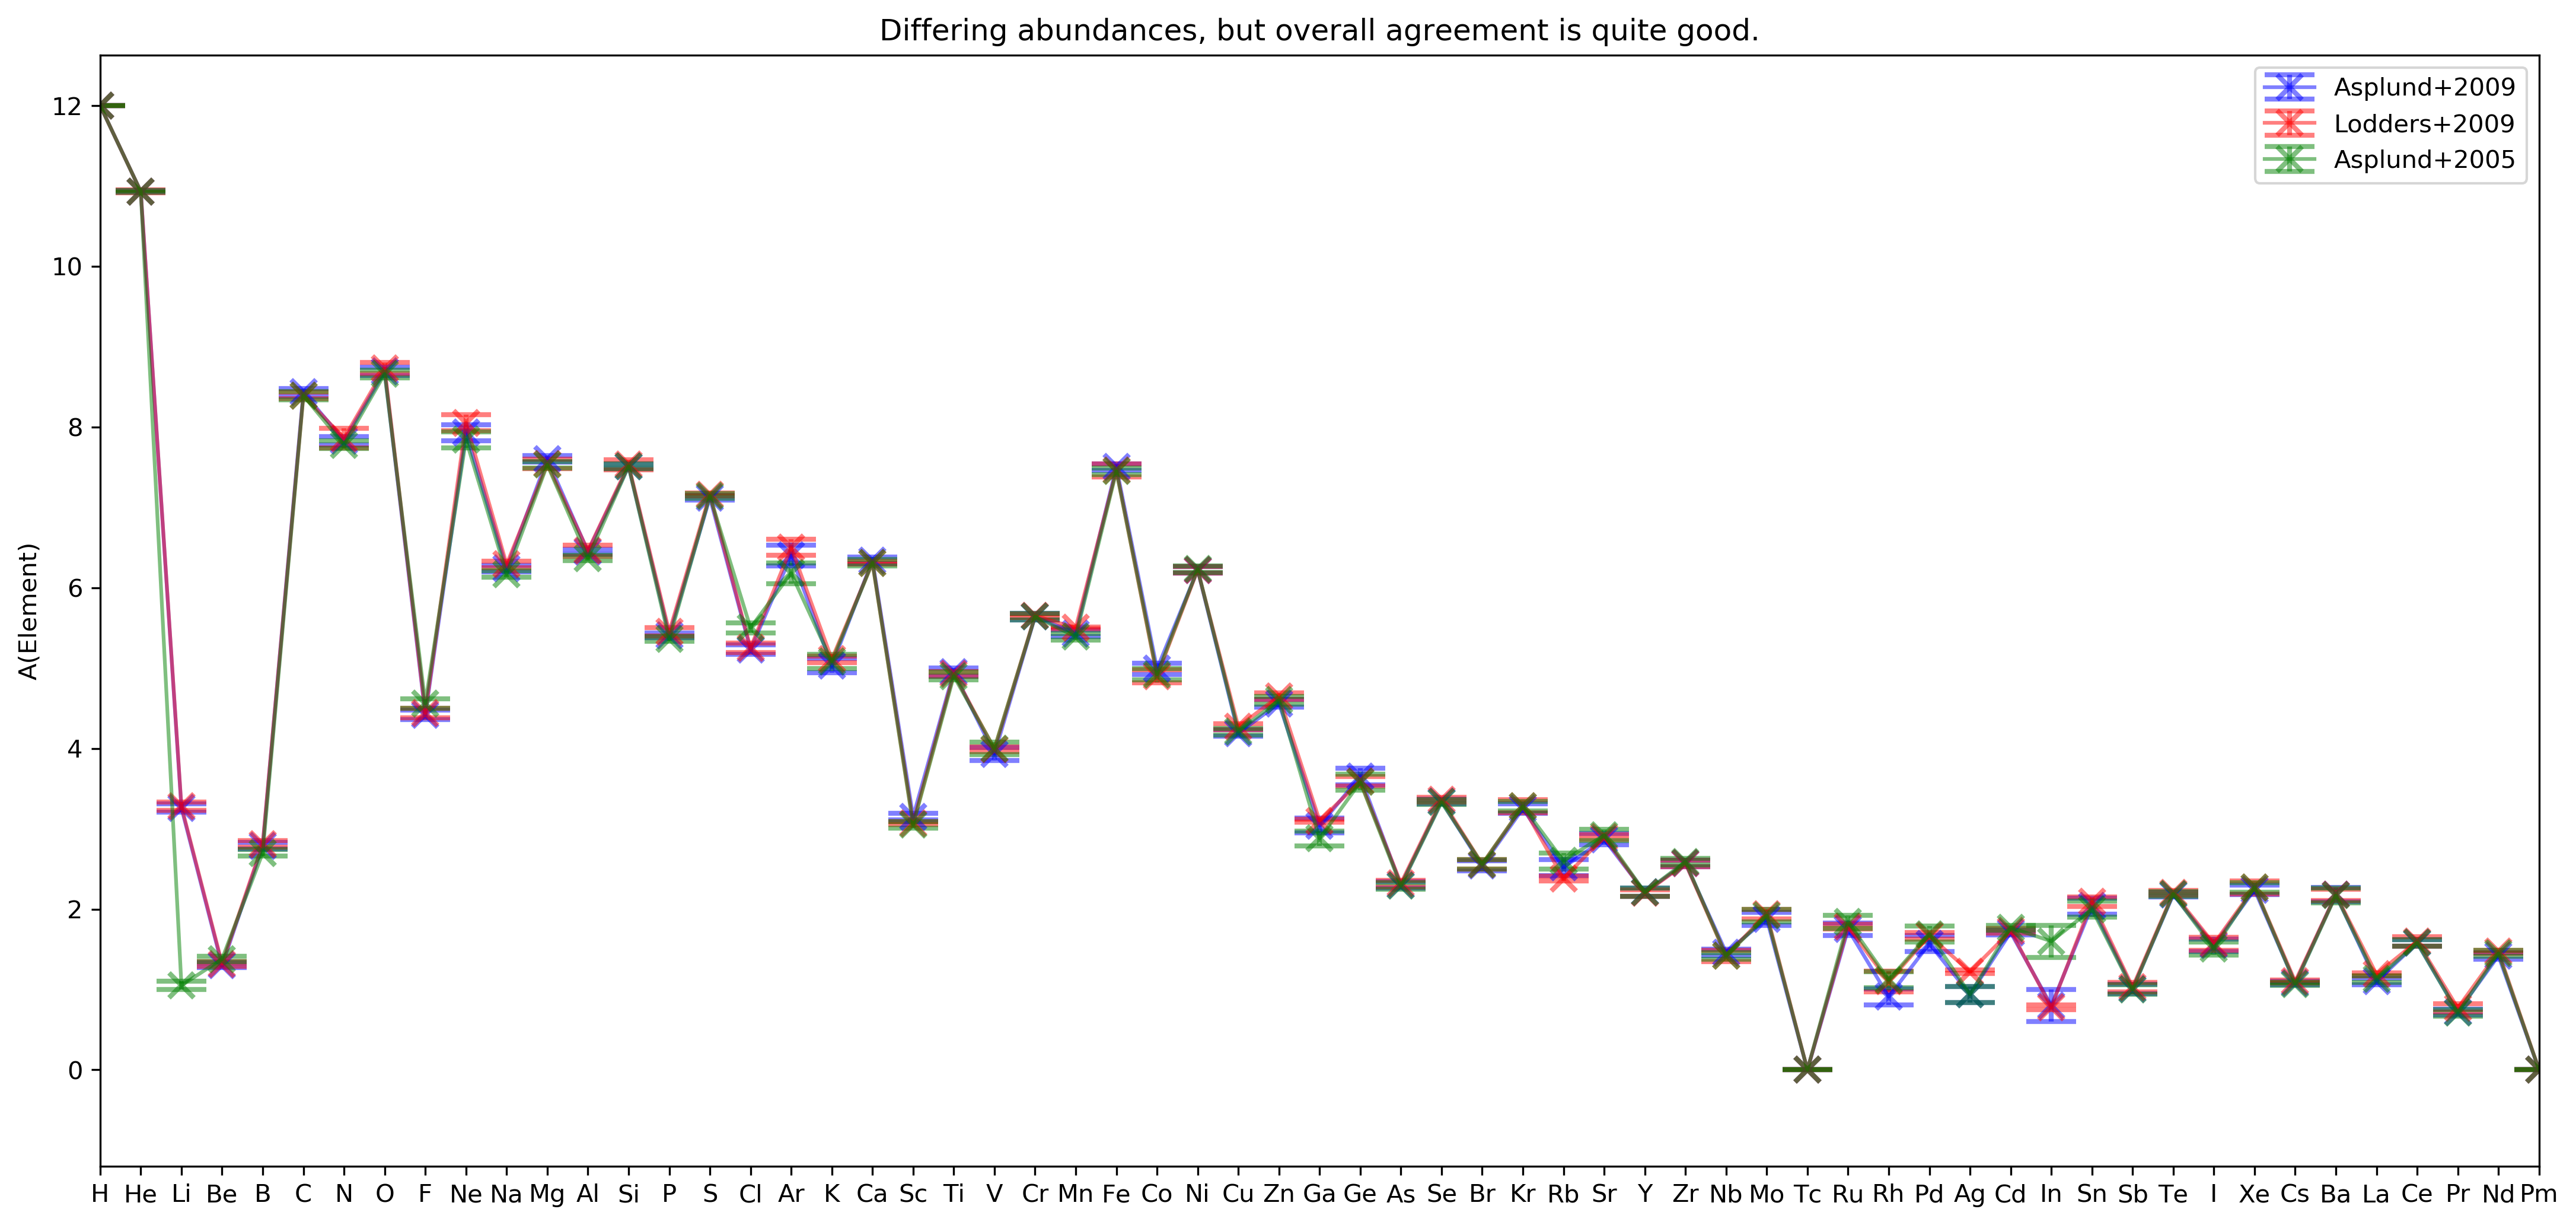

In [13]:
# Now we plot the abundances of these three Solar abundance patterns

fig = plt.figure(figsize=(17.69,8.27), dpi=300)
ax1 = fig.add_subplot(111)
ax1.errorbar(np.arange(len(symbols)),basic_solar.table['photospheric'],xerr=None,yerr=basic_solar.table['error'], alpha = 0.5, linestyle = '-',marker='x',capthick =2,capsize = 10, ms = 10, mew = 2, color = 'b',elinewidth=2,label= 'Asplund+2009')
ax1.errorbar(np.arange(len(symbols)),basic_solar_lodders.table['photospheric'],xerr=None,yerr=basic_solar_lodders.table['error'], alpha = 0.5, linestyle = '-',marker='x',capthick =2,capsize = 10, ms = 10, mew = 2, color = 'r',elinewidth=2,label= 'Lodders+2009')
ax1.errorbar(np.arange(len(symbols)),basic_solar_asplund05.table['photospheric'],xerr=None,yerr=basic_solar_asplund05.table['error'], alpha = 0.5, linestyle = '-',marker='x',capthick =2,capsize = 10, ms = 10, mew = 2, color = 'g',elinewidth=2,label= 'Asplund+2005')
plt.xticks(np.arange(len(symbols)), symbols)
plt.xlim((0,60))
plt.ylabel("A(Element)")
plt.title("Differing abundances, but overall agreement is quite good.")
plt.legend()
plt.show()

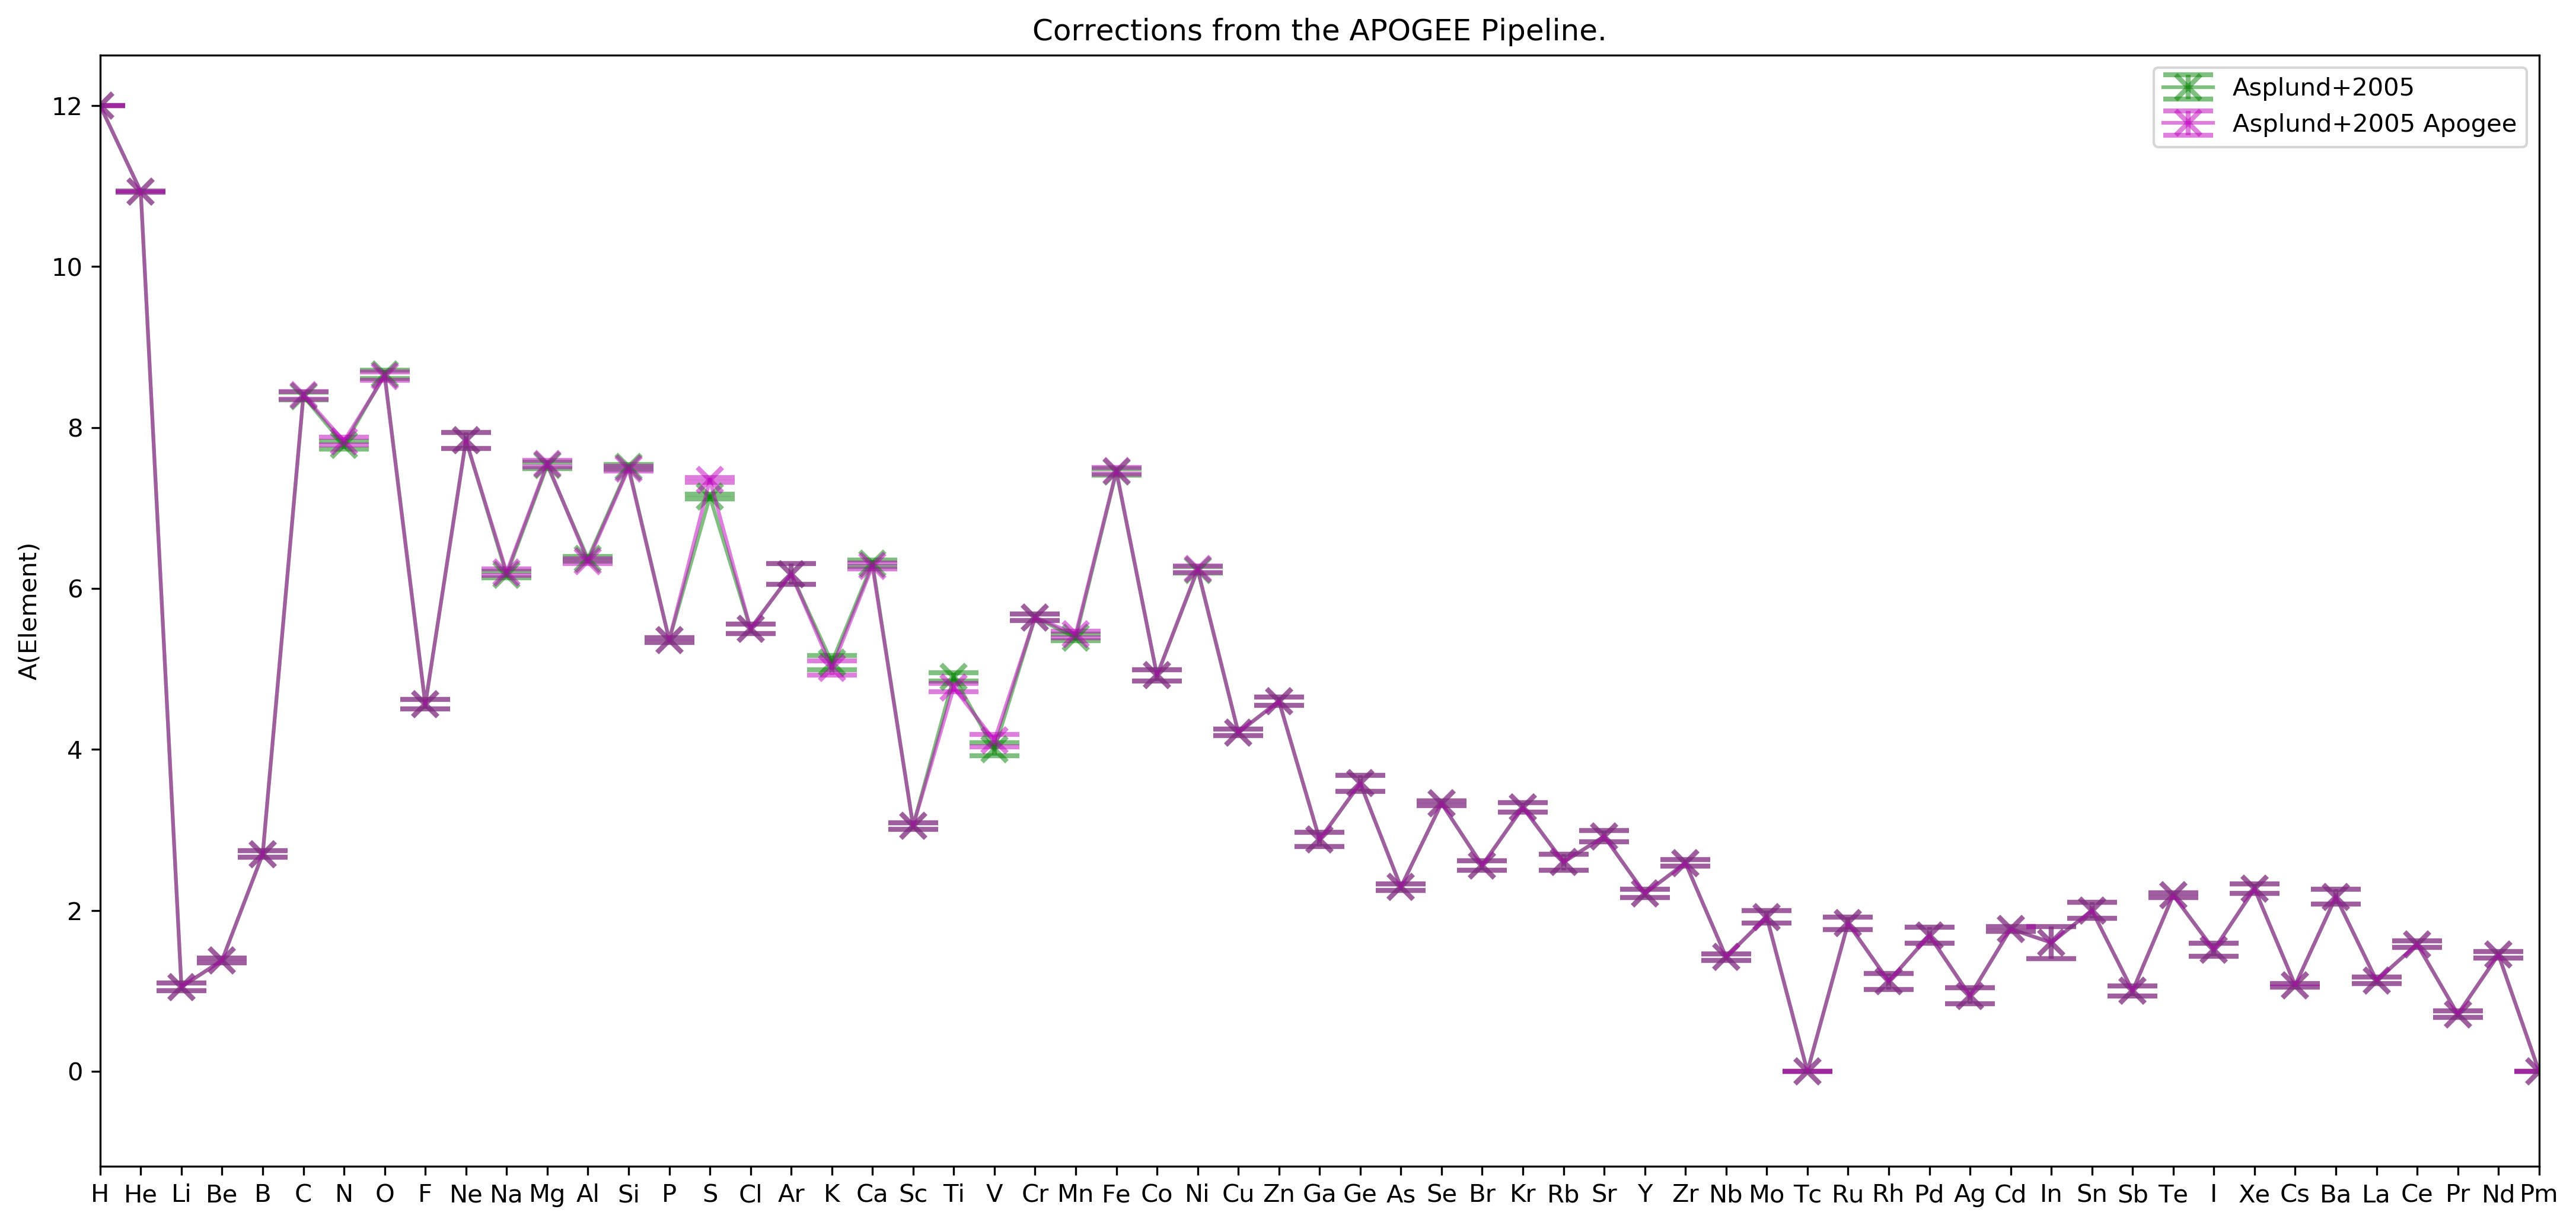

In [14]:
# Here we load an APOGEE correction for Asplund+ 2005

basic_solar_apogee = solar_abundances()
getattr(basic_solar_apogee, 'Asplund05_apogee_correction')()

# And plot a comparison to the original Asplund+ 2005 abundances

fig = plt.figure(figsize=(17.69,8.27), dpi=300)
ax1 = fig.add_subplot(111)
ax1.errorbar(np.arange(len(symbols)),basic_solar_asplund05.table['photospheric'],xerr=None,yerr=basic_solar_asplund05.table['error'], alpha = 0.5, linestyle = '-',marker='x',capthick =2,capsize = 10, ms = 10, mew = 2, color = 'g',elinewidth=2,label= 'Asplund+2005')
ax1.errorbar(np.arange(len(symbols)),basic_solar_apogee.table['photospheric'],xerr=None,yerr=basic_solar_apogee.table['error'], alpha = 0.5, linestyle = '-',marker='x',capthick =2,capsize = 10, ms = 10, mew = 2, color = 'm',elinewidth=2,label= 'Asplund+2005 Apogee')

plt.xticks(np.arange(len(symbols)), symbols)
plt.xlim((0,60))
plt.ylabel("A(Element)")
plt.title("Corrections from the APOGEE Pipeline.")
plt.legend()
plt.show()

## Solar scaled material
Sometimes it is handy to have solar scaled material but at a different metallicity

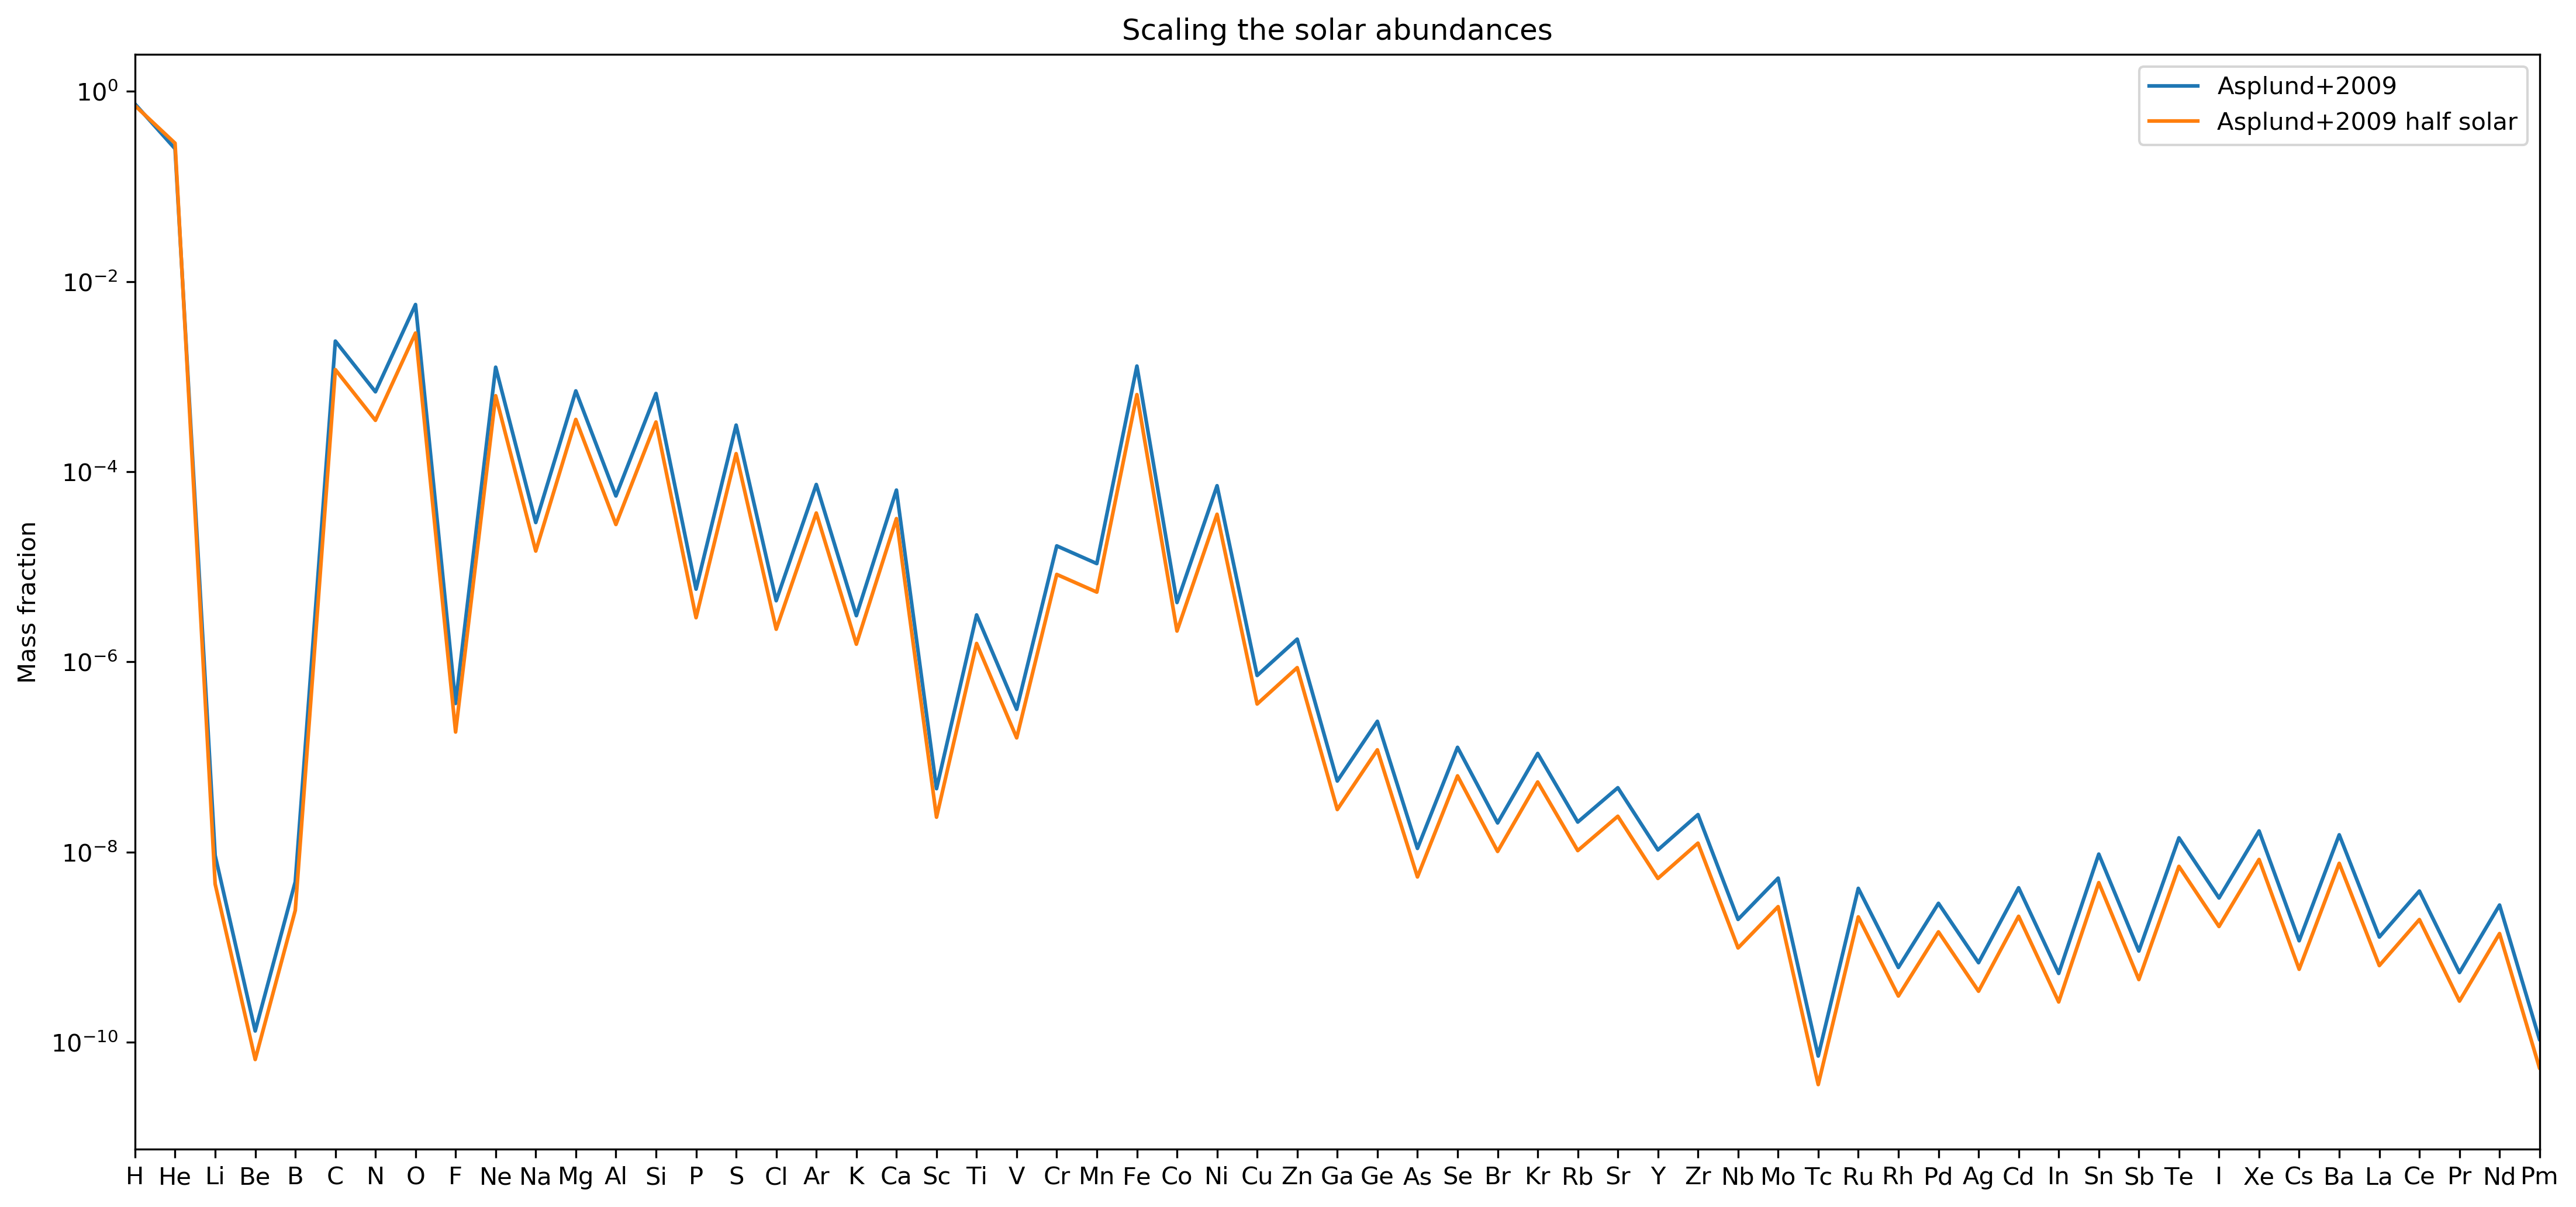

In [15]:
from Chempy.infall import PRIMORDIAL_INFALL

# We initialise the primordial infall routine

solar_scaled_material = PRIMORDIAL_INFALL(list(basic_solar.all_elements),np.copy(basic_solar.table))

# and ask to give back the fractions of solar scaled material with [FE/H] = -0.3 dex

solar_scaled_material.solar(-0.3)

# Then we plot a comparison

fig = plt.figure(figsize=(17.69,8.27), dpi=300)
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(len(symbols)),basic_solar.fractions,label= 'Asplund+2009')
ax1.plot(np.arange(len(symbols)),solar_scaled_material.fractions, label= 'Asplund+2009 half solar')

plt.xticks(np.arange(len(symbols)), symbols)
plt.xlim((0,60))
plt.ylabel("Mass fraction")
plt.yscale('log')
plt.title("Scaling the solar abundances")
plt.legend()
plt.show()